## **Actividad: Trabajando con redes neuronales y Deep Learning**

In [2]:
#Importamos bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Almacenamos ruta en variable
ruta = r"D:\Ricardo\Programacion\Data_Science\Talentech\Analisis_de_datos\Proyecto\BD\BASE_TOTAL.v2.xlsx"

In [4]:
# Creamos DatFrame
df_ruta = pd.read_excel(ruta)
df_ruta

,Mercado,Producto,Precio $/KG,mes,dia,año,mes_num
0,Cartagena,Yuca,594,Enero,5,2013,1
1,Cartagena,Yuca,533,Enero,12,2013,1
2,Cartagena,Yuca,523,Enero,19,2013,1
3,Cartagena,Yuca,531,Enero,26,2013,1
4,Cartagena,Yuca,542,Febrero,2,2013,2
...,...,...,...,...,...,...,...
1790,Cartagena,Platano,1900,Julio,27,2024,7
1791,Cartagena,Platano,1788,Agosto,3,2024,8
1792,Cartagena,Platano,1800,Agosto,10,2024,8
1793,Cartagena,Platano,1988,Agosto,17,2024,8


In [19]:
# Agregamos columna de fecha por año-mes
df_ruta['año_mes'] = df_ruta['año'].astype(str)+ df_ruta['mes_num'].astype(str).str.zfill(2)
df_ruta['año_mes'] = df_ruta['año_mes'].astype(int)

df_ruta

,Mercado,Producto,Precio $/KG,mes,dia,año,mes_num,año_mes
0,Cartagena,Yuca,594,Enero,5,2013,1,201301
1,Cartagena,Yuca,533,Enero,12,2013,1,201301
2,Cartagena,Yuca,523,Enero,19,2013,1,201301
3,Cartagena,Yuca,531,Enero,26,2013,1,201301
4,Cartagena,Yuca,542,Febrero,2,2013,2,201302
...,...,...,...,...,...,...,...,...
1790,Cartagena,Platano,1900,Julio,27,2024,7,202407
1791,Cartagena,Platano,1788,Agosto,3,2024,8,202408
1792,Cartagena,Platano,1800,Agosto,10,2024,8,202408
1793,Cartagena,Platano,1988,Agosto,17,2024,8,202408


In [20]:
# Verificamos estructura del DataFrame
df_ruta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Mercado      1795 non-null   object
 1   Producto     1795 non-null   object
 2   Precio $/KG  1795 non-null   int64 
 3   mes          1795 non-null   object
 4   dia          1795 non-null   int64 
 5   año          1795 non-null   int64 
 6   mes_num      1795 non-null   int64 
 7   año_mes      1795 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 112.3+ KB


In [14]:
# Verificamos valores unicos de cada columna del DataFrame
{col: df_ruta[col].unique() for col in df_ruta}

{'Mercado': array(['Cartagena'], dtype=object),
 'Producto': array(['Yuca', 'Papa', 'Platano'], dtype=object),
 'Precio $/KG': array([ 594,  533,  523,  531,  542,  521,  490,  517,  488,  489,  473,
         479,  475,  453,  438,  433,  398,  407,  442,  421,  380,  403,
         382,  388,  370,  354,  349,  359,  348,  344,  337,  341,  338,
         334,  408,  355,  340,  378,  320,  374,  381,  371,  362,  345,
         335,  353,  448,  387,  347,  328,  331,  342,  350,  351,  363,
         356,  361,  420,  392,  402,  364,  431,  379,  418,  389,  415,
         526,  549,  518,  500,  528,  525,  550,  607,  585,  616,  573,
         590,  651,  689,  726,  737,  719,  834,  695,  755,  869,  908,
         840,  883,  850,  836,  890,  851,  824,  860,  906,  964, 1002,
        1052, 1015, 1000,  896,  956, 1001, 1053, 1058, 1014,  969,  965,
        1104,  958, 1017, 1042, 1063, 1009,  950,  988, 1128, 1188, 1149,
        1113, 1072, 1070, 1056, 1029, 1013,  981,  917,  880

### **Analisis estadistico**

In [15]:
# Aplicamos analisis estadistico los precios por productos
df_ruta.groupby("Producto")["Precio $/KG"].describe()

,count,mean,std,min,25%,50%,75%,max
Producto,,,,,,,,
Papa,592.0,1088.790541,639.278533,322.0,605.0,883.0,1360.75,3375.0
Platano,601.0,1604.846922,710.327542,618.0,1175.0,1394.0,1900.00,4500.0
Yuca,602.0,902.641196,486.272358,320.0,519.0,792.0,1091.50,3083.0


Observamos que:
*  El ***platano*** tiene el precio promedio mas alto y una mayor dispersion, por tanto, podemos inferir que su precio e smuy volatil.
*  Contrario al platano, la ***yuca*** tiene el precio promedio mas bajo y una menor variabilidad, como lo observamos en el dato de ladispersion
*  Por su parte, la ***papa*** tiene una distribucion mas centrada

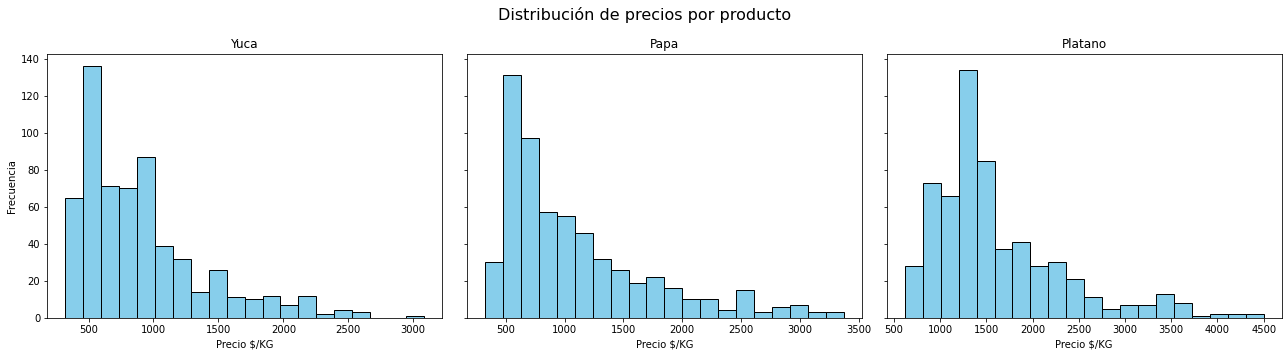

In [16]:
# Almacenamos en una variable los tres productos únicos
productos = df_ruta['Producto'].unique()[:3]

# Creamos la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5),sharey=True)

for i, producto in enumerate(productos):
    subset = df_ruta[df_ruta['Producto'] == producto]
    axs[i].hist(subset['Precio $/KG'], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{producto}')
    axs[i].set_xlabel('Precio $/KG')
    if i == 0:
        axs[i].set_ylabel('Frecuencia')

fig.suptitle('Distribución de precios por producto', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

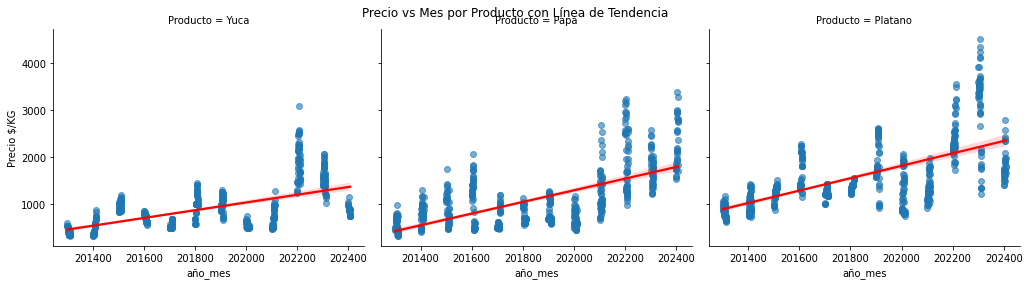

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usamos lmplot, que ya genera scatterplot + línea de tendencia
sns.lmplot(
    data=df_ruta,
    x='año_mes',
    y='Precio $/KG',
    col='Producto',
    col_wrap=3,         # Cambia esto si tienes más o menos productos
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Precio vs Mes por Producto con Línea de Tendencia')
plt.show()